## Análise nas vendas da marca Adidas, com possíveis previsões dos preços, verificação de variáveis e suas correlações.



## 1. Importação das bibliotecas mais importantes para esta análise, bem como as manipulações do dataframe

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model as ln

In [6]:
# Leitura do arquivo xlsx com a utilização do read

df = pd.read_excel("C:/Users/lucas/OneDrive/PROGRAMAÇÃO/Adidas US Sales Datasets.xlsx")

In [379]:
# Visualização do dataframe

df.head(6)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60,900,540000.0,162000.0,0.30,In-store
5,Foot Locker,1185732,2020-01-06,Northeast,New York,New York,Women's Apparel,50,1000,500000.0,125000.0,0.25,In-store


In [8]:
# Suas possíveis informações, como contagem, média, desvio padrão e ademais...

df.describe()

,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
count,9.648000e+03,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,1.173850e+06,45.216625,256.930037,93273.437500,34425.244761,0.422991
std,2.636038e+04,14.705397,214.252030,141916.016727,54193.113713,0.097197
min,1.128299e+06,7.000000,0.000000,0.000000,0.000000,0.100000
25%,1.185732e+06,35.000000,106.000000,4254.500000,1921.752500,0.350000
50%,1.185732e+06,45.000000,176.000000,9576.000000,4371.420000,0.410000
75%,1.185732e+06,55.000000,350.000000,150000.000000,52062.500000,0.490000
max,1.197831e+06,110.000000,1275.000000,825000.000000,390000.000000,0.800000


In [9]:
# Informações sobre o tipo de dataframe, bem como a quantidade de colunas e linhas

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   int64         
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(6)
memory usage: 980.0+ KB


In [278]:
# Aqui, vamos utilizar nomear uma variável para excluir os objetos e analisar as correlações

df1 = df.select_dtypes(exclude = 'object')

In [382]:
# Utilizando o pacote do Pandas corr é possível analisar as correlações

## A maior correlação que é possível verificar é Operating Profit e Total Sales
df.corr()

,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
Retailer ID,1.000000,-0.391684,-0.003194,-0.083580,-0.027137,0.216780
Price per Unit,-0.391684,1.000000,0.265869,0.435811,0.394546,-0.137486
Units Sold,-0.003194,0.265869,1.000000,0.913431,0.892379,-0.305479
Total Sales,-0.083580,0.435811,0.913431,1.000000,0.956307,-0.364592
Operating Profit,-0.027137,0.394546,0.892379,0.956307,1.000000,-0.211920
Operating Margin,0.216780,-0.137486,-0.305479,-0.364592,-0.211920,1.000000


In [280]:
# Para melhor visualização, teremos o gráfico abaixo confirmando o que foi dito anteriormente:

df1.corr().style.background_gradient(cmap = 'Reds')

,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
Retailer ID,1.000000,-0.391684,-0.003194,-0.083580,-0.027137,0.216780
Price per Unit,-0.391684,1.000000,0.265869,0.435811,0.394546,-0.137486
Units Sold,-0.003194,0.265869,1.000000,0.913431,0.892379,-0.305479
Total Sales,-0.083580,0.435811,0.913431,1.000000,0.956307,-0.364592
Operating Profit,-0.027137,0.394546,0.892379,0.956307,1.000000,-0.211920
Operating Margin,0.216780,-0.137486,-0.305479,-0.364592,-0.211920,1.000000


## 2. A partir de agora, analisaremos qual Varejista i.e, Vendedor (Retailer) obteve mais lucro

In [495]:
# Primeiramente, vamos analisar as cidades que mais venderam os produtos da Adidas, para isso, faremos um rank:

df_city['Hierarchy_Rank'] = df_city['Total Sales'].rank(ascending=False)



In [496]:
# Assim, obteremos:

df_city.head(5)

,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Hierarchy_Rank
City,,,,,,,
Albany,170745408,7326,57186,24427804.0,9429850.91,61.38,10.0
Albuquerque,243712584,10931,52633,19865016.0,6738060.41,84.87,18.0
Anchorage,169711614,8239,30815,14753103.0,4498345.86,50.38,30.0
Atlanta,245263275,10110,56391,18997466.0,6893289.61,89.36,20.0
Baltimore,170745408,6346,20818,7758059.0,2757642.12,58.67,47.0


In [488]:
df_city.groupby('Hierarchy_Rank')

In [497]:
# Para esse objetivo, somaremos o total de vendas e agruparemos por Retailer
# OBS: É bem parecido com uma consulta do sql, de modo que poderiamos utlizar também aqui, deixaremos para outra oportunidade.

df2= df.groupby('Retailer').sum('Total Sales')

In [498]:
# Visualizando;

df2.head(10)

,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
Retailer,,,,,,
Amazon,1125259668,46273,197990,77698912.0,28818503.31,396.56
Foot Locker,3098455585,118098,604369,220094720.0,80722124.81,1102.09
Kohl's,1212383226,45947,287375,102114753.0,36811252.58,431.87
Sports Direct,2402814862,85439,557640,182470997.0,74332954.96,904.02
Walmart,734755930,29537,206225,74558410.0,25782052.61,254.49
West Gear,2751632862,110956,625262,242964333.0,85667873.18,991.99


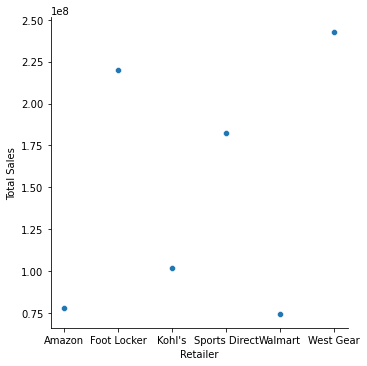

In [385]:
# Nesse caso, vamos analisar graficamente com um gráfico de dispersão, lembrando que no gráfico temos uma potência elevado a 
# 8, ou seja, estamos falando de quase bilhões, mas ainda na casa dos milhões (10^6 = milhões ou mega, 10^9 = bilhões ou giga)

sns.relplot(x="Retailer", y='Total Sales', data=df2)

<AxesSubplot:xlabel='Retailer', ylabel='Total Sales'>

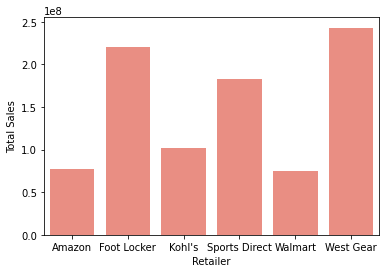

In [389]:
# Podemos utilizar o gráfico de barras, mas para isso precisamos indexar o parâmetro Retailer

df2['Retailer'] = df2.index

sns.barplot(x="Retailer", y='Total Sales', data=df2, color ="salmon")

## 3. Treinamento do Modelo e Previsões

In [311]:
# Nesse caso, precisamos tratar apenas de dados númericos
# Asssim, vamos dar um drop (excluir) os varejistas da tabela e copiar o valor total de vendar

x_train = df2.drop(['Retailer','Total Sales'], axis =1)


y_train = df2['Total Sales'].copy()

In [312]:
# Caso tenha valores nulos no dataframe, vamos substituir por zero
x1 = x_train.fillna(0)
y1 = y_train.fillna(0)

In [390]:
# É possível observar que não temos tais valores, conforme visualização abaixo:

x1.head(6)
y1.head(8)

Retailer
Amazon            77698912.0
Foot Locker      220094720.0
Kohl's           102114753.0
Sports Direct    182470997.0
Walmart           74558410.0
West Gear        242964333.0
Name: Total Sales, dtype: float64

In [314]:
# Vamos utlizar LinearRegression da biblioteca linear_model

model_lr = ln.LinearRegression()

model_lr.fit(x1, y1)

LinearRegression()

In [315]:
# Admitindo uma variável pred, teremos:

pred = model_lr.predict(x1)

In [316]:
# As 20 primeiras:

pred[0:20]

array([7.76989120e+07, 2.20094720e+08, 1.02114753e+08, 1.82470997e+08,
       7.45584100e+07, 2.42964333e+08])

In [391]:
# Agora, manipularemos os dados de modo a obter os resultados

ds1 = df2.copy()

In [392]:
# Criaremos uma nova coluna na tabela df2 que agora é a ds1

ds1['Previsão'] = pred

In [405]:
# Os dados estão abaixo para visualização da previsão, erro (positivo ou negativo), módulo do erro, erro percentual  (positivo ou negativo)
# e módulo do erro percentual

ds1[['Total Sales', 'Previsão', 'error', 'erros_abs', 'error_perc', 'error_perc_abs']].head(10)

,Total Sales,Previsão,error,erros_abs,error_perc,error_perc_abs
Retailer,,,,,,
Amazon,77698912.0,7.769891e+07,0.000129,0.000129,1.659479e-12,1.659479e-12
Foot Locker,220094720.0,2.200947e+08,-0.000158,0.000158,-7.195518e-13,7.195518e-13
Kohl's,102114753.0,1.021148e+08,0.000102,0.000102,9.941914e-13,9.941914e-13
Sports Direct,182470997.0,1.824710e+08,-0.000086,0.000086,-4.713599e-13,4.713599e-13
Walmart,74558410.0,7.455841e+07,0.000162,0.000162,2.166470e-12,2.166470e-12
West Gear,242964333.0,2.429643e+08,-0.000149,0.000149,-6.128159e-13,6.128159e-13


In [410]:
# Manipulando as colunas e criando novas para obtenção dos valores visualizados nas tabelas

ds1['error'] = ds1['Total Sales'] - ds1['Previsão']
ds1['erros_abs'] = np.abs(ds1['error'])
ds1['error_perc']= (ds1['Total Sales'] - ds1['Previsão'])/ds1['Total Sales']

ds1['error_perc_abs'] = np.abs(ds1['error_perc'])



In [409]:
# Por fim nosso erro foi 10^-12!!! Um belo início.

np.mean(ds1['error_perc_abs'])

1.1039781242970589e-12

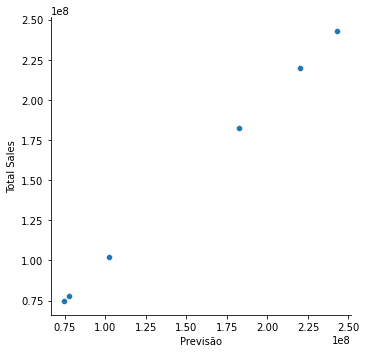

In [411]:
# Plotando as previsões vs Os valores totais, são seis pontos no gráfico, referente aos 6 verejistas.

sns.relplot(x='Previsão', y='Total Sales', data=ds1)

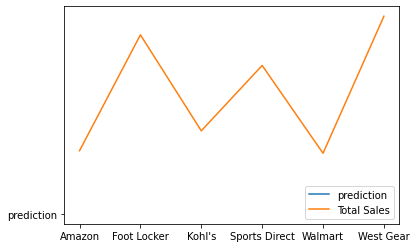

In [412]:
# É possível afirmar que o acerto foi de quase 100%

plt.plot('prediction',data=ds1)
plt.plot('Total Sales',data=ds1)
plt.legend(['prediction', 'Total Sales'])

In [414]:
ds1[['Total Sales', 'Previsão', 'error', 'erros_abs', 'error_perc']].head(10)

,Total Sales,Previsão,error,erros_abs,error_perc
Retailer,,,,,
Amazon,77698912.0,7.769891e+07,0.000129,0.000129,1.659479e-12
Foot Locker,220094720.0,2.200947e+08,-0.000158,0.000158,-7.195518e-13
Kohl's,102114753.0,1.021148e+08,0.000102,0.000102,9.941914e-13
Sports Direct,182470997.0,1.824710e+08,-0.000086,0.000086,-4.713599e-13
Walmart,74558410.0,7.455841e+07,0.000162,0.000162,2.166470e-12
West Gear,242964333.0,2.429643e+08,-0.000149,0.000149,-6.128159e-13


## 4. Conclusões:

- 1. O maior vendendor foi West Gear
- 2. As previsões obtiveram um erro de 10^-12
- 3. Operating Profit (lucro operacional) tem bastante influência no valor total de vendas
- 4. A cidade que mais vendeu foi Charleston, com aproximadamente 152 mil habitantes
- 5. A cidade que menos vendeu foi Omaha, com aproximadamente 486 mil habitantes